In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import config

In [2]:
try:
    result = pd.read_excel(config.result + "result.xlsx")

except:
    result = pd.DataFrame(columns =['Batch_Size', 'Epochs', 'Exact Match','F1 Score'])

In [3]:
results = []

for i in range (len(result.Batch_Size.unique())):
    temp = pd.DataFrame(columns =['Batch_Size', 'Epochs', 'Exact Match','F1 Score'])
    for j in range (len(result.Epochs.unique())):
        batch_size = result.Batch_Size[i*(len(result.Epochs.unique()))]
        epochs = result.Epochs[j]
        em = result['Exact Match'][i*(len(result.Epochs.unique()))+ j]
        f1 = result['F1 Score'][i*(len(result.Epochs.unique()))+ j]
        temp = temp.append({'Batch_Size':batch_size,
                            'Epochs': epochs,
                            'Exact Match': em,
                            'F1 Score' : f1 }, ignore_index=True)
    results.append(temp)

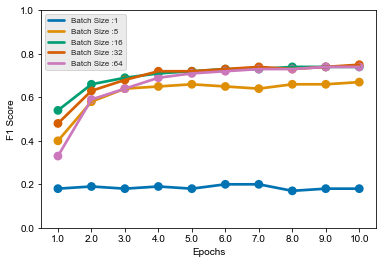

In [4]:
f, ax = plt.subplots(1, 1)
plt.ylim(0, 1)
palette = sns.color_palette("colorblind")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

labels = []
count = 0
for res in results:
    sns.pointplot(data=res, x="Epochs", y= "F1 Score" , label = 'Batch Size :{}'.format(str(int(res.Batch_Size.unique()))), color = palette[count])
    count+=1
    labels.append('Batch Size :{}'.format(str(int(res.Batch_Size.unique()))))

ax.legend(handles=ax.lines[::len(results[0])+1], labels = labels, loc = 2, fontsize = 8 )

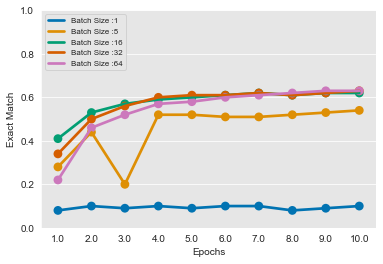

In [5]:
f, ax = plt.subplots(1, 1)
plt.ylim(0, 1)
palette = sns.color_palette("colorblind")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

labels = []
count = 0
for res in results:
    sns.pointplot(data=res, x="Epochs", y= "Exact Match" , label = 'Batch Size :{}'.format(str(int(res.Batch_Size.unique()))), color = palette[count])
    count+=1
    labels.append('Batch Size :{}'.format(str(int(res.Batch_Size.unique()))))

ax.legend(handles=ax.lines[::len(results[0])+1], labels = labels, loc = 2, fontsize = 8 )